## 1. Introduction 
A term deposit is a amount collected by the financial institution on agreed rate of interest over a fixed tenure or conditions. To increase the capacity of bank to lend more money to the customers in the form of loans, bank always seeks to raise higher term deposit from the customer. There are many methods to sell term deposits to their customers. It can be executed through one-to-one meetings telephonic marketing, digital marketing, and advertisement.

Despite of different methods, telephonic marketing is most convinient to communicate with customers. But this method needs large amount of money as call centers are involved to execute these campaigns. Hence, it is very important to identity the customers before head so that they can be particularly targeted through call.

This dataset is about the direct marketing campaign (phone calls) of Portuguese bank with a classification goal to examine the customers subscription behavior.

### Intended Audiences:
This dataset is beneficial to the marketing manager and digital marketing manager of the bank. They can review and identify their potential customer for their term deposit plan.


### 1.1 Purpose
The main purpose of the project is to carry out an in-dept analysis to find the potential customers from data provided by the marketing campaign. For this we will answer some of the question among which some are listed below:
  
  -Which type of job holders should we focus for more subscribition of term deposit by the customers?
  
  -Which type of education background has subcribed more deposit of the bank?
  
  -Why some factors like age,education background of customers affect whether customer subscribes term deposit?
### 1.2 Importance
This project is  important because it provides bank with insights which will help them to make better decisions for increment of term deposit. 
### 1.3  Brief Summary:
Using different analysis we found that the following behaviour of people subscribes more term deposit:

1. People with higher education background.
2. People with no housing or personal loan.
3. People with age from 30-50. 

Also, using logistic regression, we concluded that the model correctly predicted 82.5 percent of cases.


## 2.(a) Understanding the data

In [2]:
#Importing the required libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=18)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import gc


In [3]:
#reading the dataset using pandas library
df = pd.read_csv("banking.csv",delimiter=";") 
#inside the read_csv("banking.csv",delimeter=";")
#"banking.csv" is the dataset.
#delimeter is used to form the column of the raw csv data

## 2.(b) Data Cleaning and data processing

### Data Cleaning:
Data cleaning is the process of detecting and correcting  (or removing) corrupt or inaccurate records from a record set, table or database and refers to identifying incomplete,incorrect, inaccurate or irrelevants parts of the data and then replacing,modifying or deleting the dirty or coarse data.
### Data processing 
Data processing is manipulation of data by a computer. It includes the conversion of raw data to machine-readable form, flow of data through the CPU and memory to output devices, and formatting or transformation of output. Any use of computers to perform defined operations on data can be included under data processing

For our project, the following Data cleaning and processing is being conducted:
1. We looked to see whether any "Missing or Null" values were present. There were no Null values in our data set.
2. Created new field named "number of people" to find the percentage with total.
3. Created new field name "percentage" that gives the  rate with total subscription or not subscription in details with loan.


In [4]:
df['education'].unique() # checking the unique data of column education

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [5]:
df['y'].value_counts() # Calculate the dataset result of yes and no 

no     39922
yes     5289
Name: y, dtype: int64

In [6]:
# Determining the null value if any.
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There were no any null values or missing values in our dataset

,Housing Loan,Personal Loan,Subscribe term deposit,number of people,percentage
0,no,no,no,14069,31.118533
1,no,no,yes,3135,6.934153
2,no,yes,no,19093,42.230873
3,no,yes,yes,1670,3.693791
4,yes,no,no,2658,5.879100
5,yes,no,yes,219,0.484395
6,yes,yes,no,4102,9.073013
7,yes,yes,yes,265,0.586141


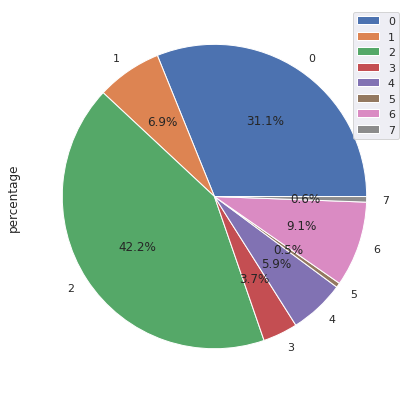

In [48]:
# Creating the table for personal loan and housingloan in "Loan with y analysis"
df_loan = df.groupby(['loan','housing','y']).count()
df_loan = df_loan.reset_index()
df_loan_new = df_loan.loc[:,['loan','housing','y','age']]
df_loan_new.rename(columns={'loan': 'Housing Loan', 'housing': 'Personal Loan',
                            'y':'Subscribe term deposit','age':'number of people'}, inplace=True)
df_loan_new["percentage"] = df_loan_new["number of people"] / sum(df_loan_new['number of people'])*100
df_loan_new.plot.pie(y = 'percentage',autopct='%2.1f%%',figsize=(7, 7))
df_loan_new

## 2.(c) Description of dataset

Below listed is the name of field along with their description in our dataset.

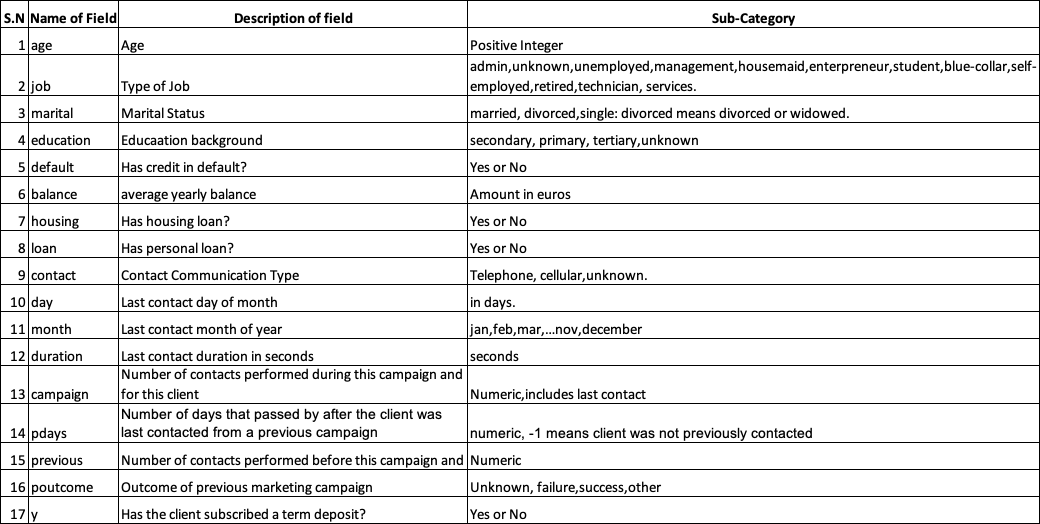


In [8]:
print((df.columns))  # find the header of column in our dataset

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [9]:
# Finding the data types of our fields
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Here,is the link of our dataset: https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets

## 2.(d) Basic descriptive features of the data

For our project we have selected direct marketing campaign (phone calls) of Portuguese bank. In our dataset we have  45211 number of rows and 17 number of columns. There are both categorical features data field (such as: "job", "marital", "education", "default","contact" "housing", "loan", "poutcome", "y","month) and numerical features data field (such as :age", "balance", "duration", "campaign", "pdays", "previous","day")


In [10]:
print(df.shape)  # find the shape of the dataset
print(df) # printing the dataset

(45211, 17)
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  

## 2.(e) Analysis and Explanation 

### A. Descriptive Analysis

#### Descriptive analysis will be used to better understand the data and identify the variables influencing the y(whether customer will subscribe term deposit ).

Descriptive analytics is the interpretation of historical data to better understand changes that have occurred in a business. Descriptive analytics describes the use of a range of historic data to draw comparisons. 

In this project via the discriptive analysis we will find the type of people who have suscribe the term deposit during the marketing campaign and provide the summary statistic of the profile of banking customers through the measure of central tendency(mean,median and mode). We will understand the effect of various factors on final result i.e. on whether customer will subscribe term deposit. 


### Data Expolaration

In [11]:
#attribute frequency 
df_freq = df['y'].value_counts()
print(df_freq)

no     39922
yes     5289
Name: y, dtype: int64


In [12]:
#creating a new data frame for pie chart
keys = df_freq.keys()
print(keys)

Index(['no', 'yes'], dtype='object')


In [13]:
value = df_freq.values
print(value)

[39922  5289]


In [14]:
df2 = pd.DataFrame({"Subscribes":keys,"Total Numbers":value})
print(df2)

  Subscribes  Total Numbers
0         no          39922
1        yes           5289


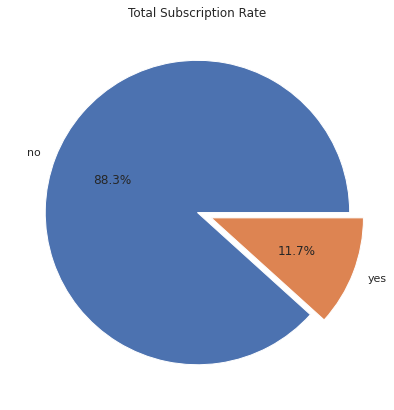

In [63]:
#pie chat to show the attribute percentage
plt.pie(df2['Total Numbers'],labels=df2['Subscribes'],autopct='%2.1f%%',explode=[0,0.097],)
plt.title("Total Subscription Rate")
fig = plt.gcf()
fig = fig.set_size_inches(7,7)


#### In total, only 11.7% of the customer contacted has subscribe the term deposit.

In [16]:
df.groupby('y').mean() # grouping all the numerical values and finding mean with respect to y 

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


####  From this we can conclude that:
-Customers who purchased term deposits are on average older than those who did not.

-For customers who purchased term deposit, the duration (last contact duration, in seconds ) is higher. The higher the duration, the more discussion of bank products and, as a result, the higher the chances of a sale

-Amazingly, campaigns (the number of contacts or calls made during the campaign) are lower for term deposit customers

### Studying the various varibales and their effect on "y"

## 2.(e)(i) Job feature and y

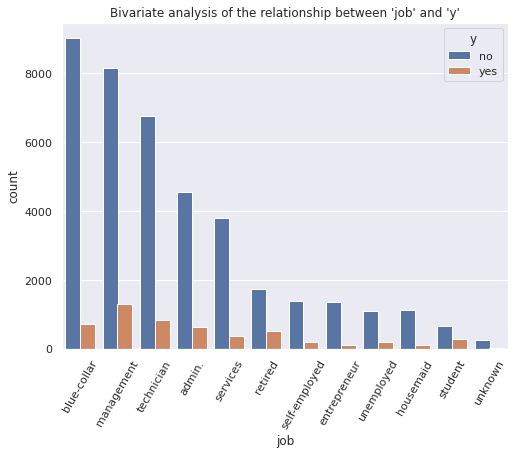

In [17]:
# using seaborn library
#Bivariate analysis of the relationship between 'job' and 'y'
sns.set_theme(style='darkgrid') # theme set 
sns.set(rc = {'figure.figsize':(8, 6)}) # assiging the figure size
job = sns.countplot(x="job", data = df, hue = "y", order = df["job"].value_counts().index) 
job.tick_params(axis='x', rotation=60) # giving axis
plt.title("Bivariate analysis of the relationship between 'job' and 'y'") # giving thetital of the figure
plt.show()  # showing the figure

#### The bank focused its efforts on people with professional backgrounds. In comparison to others, most of term deposit takers have a high qualification.

In [18]:
df.groupby('job').mean() # grouping all the numerical values and finding mean with respect to job

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


#### From the above table we can see the different job title having means of different fields such as age, balance, day, duration, campaign, pdays, previous.

## 2.(e)(ii) Marital Status and y

In [19]:
df.groupby('marital').mean() # grouping all the numerical values and finding mean with respect to marital status

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


Text(0, 0.5, 'Proportion of Customers')

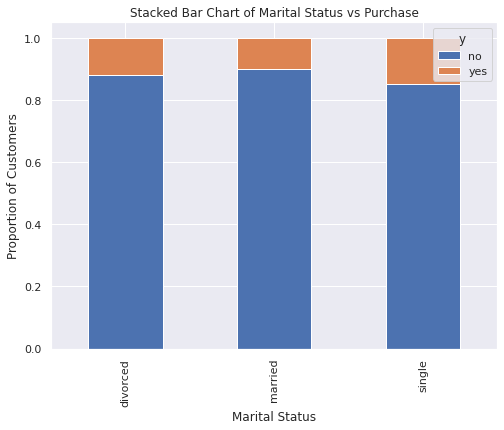

In [20]:
# using the pandas library
# Stacked Bar Chart of Marital Status vs Purchase
table=pd.crosstab(df.marital,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')


#### The marital status does not appear to be a significant predictor of the outcome variable because the percentage of people who subscribed term deposit is almost same in every marital status with respect to their numbers.


## 2.(e)(iii) Education and y

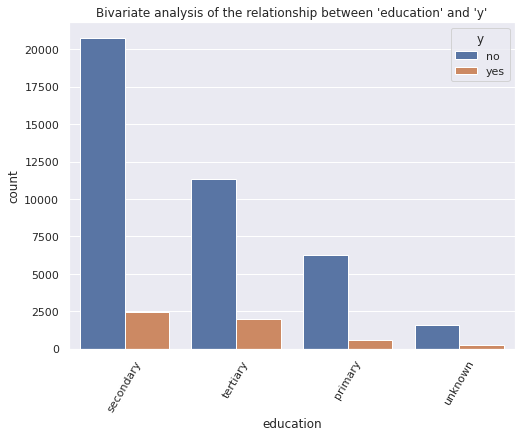

In [21]:
# Bivariate analysis of the relationship between 'education' and 'y'
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8, 6)})
education = sns.countplot(x="education", data = df, hue = "y", order = df["education"].value_counts().index)
education.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'education' and 'y'")
plt.show()

#### As shown in the above chat we can analyze that people having secondary qualifications have subscribe more term deposit in terms of numbers.

Text(0, 0.5, 'Proportion of Customers')

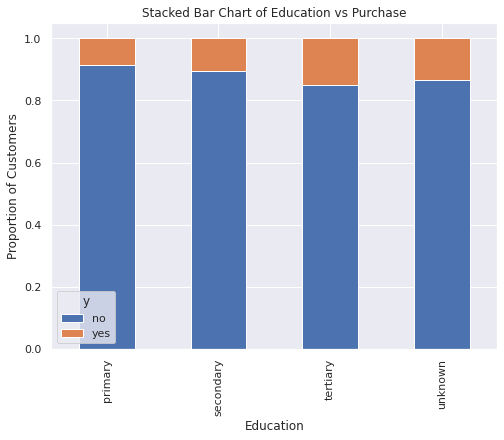

In [22]:
# Stacked Bar Chart of Education vs Purchase
table=pd.crosstab(df.education,df.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')


#### From figure "Bivariate analysis of the relationship between 'education' and y", we see that the number of people with secondary education background has subscribed more term deposit. However, from above figure we can conclude that people having tertiary education has subscribed more percentage of the term deposit in respect with their numbers.

## 2.(e)(iv) Month and y

Text(0, 0.5, 'Frequency of Purchase')

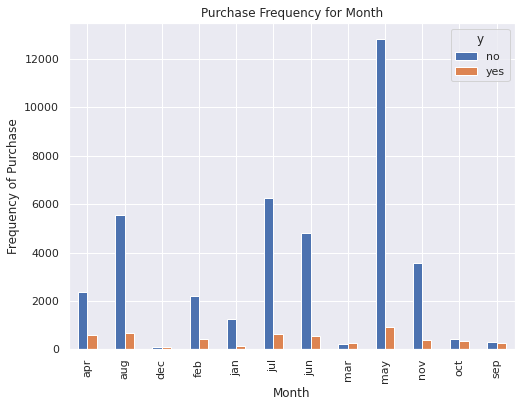

In [23]:
# Bar chart of Purchase Frequency for Month
pd.crosstab(df.month,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')


#### May had a slightly higher number of subscribers than the other months. Exception of December and January, the subscription average is nearly the same regardless of how many people are contacted. These were the months with the fewest subscriptions. One possible explanation is that people go on vacation. (People in the Americas are accustomed to taking vacations during this time of year.) Because the plot shows a proportional distribution of "yes," the "month" feature will be removed because it has no effect on the outcome.

## 2.(e)(v)Loan and y

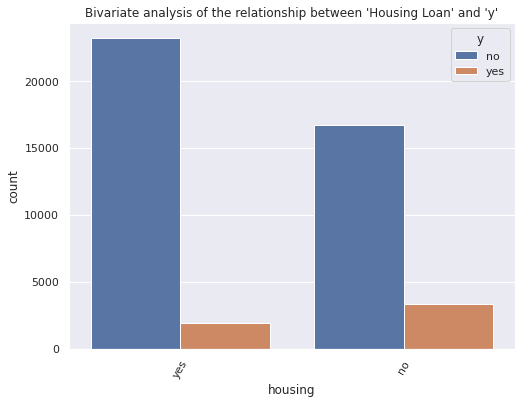

In [44]:
# Bivariate analysis of the relationship between 'Housing Loan' and 'y'
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8, 6)})
housing = sns.countplot(x="housing", data = df, hue = "y", order = df["housing"].value_counts().index)
housing.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'Housing Loan' and 'y'")
plt.show()

#### People who do not have a housing loan are more likely to subscribe for more term deposit. 

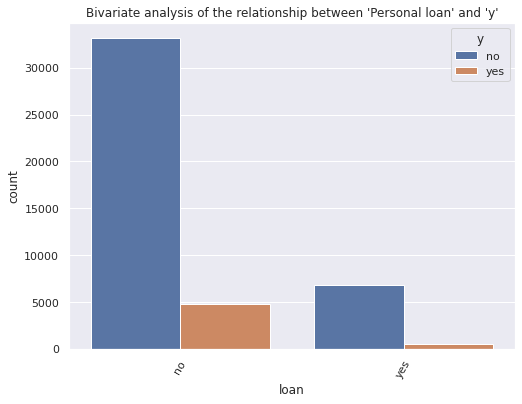

In [45]:
# Bivariate analysis of the relationship between 'Personal loan' and 'y'
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8, 6)})
loan = sns.countplot(x="loan", data = df, hue = "y", order = df["loan"].value_counts().index)
loan.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'Personal loan' and 'y'")
plt.show()

#### People who did not have a personal loan, were willing to accept a more deposit term than with the people having personal loan. 

#### Also, it is observed that people with personal loan subscribed higher proportion of term deposit than with people having housing loan.

,Housing Loan,Personal Loan,Subscribe term deposit,number of people,percentage
0,no,no,no,14069,31.118533
1,no,no,yes,3135,6.934153
2,no,yes,no,19093,42.230873
3,no,yes,yes,1670,3.693791
4,yes,no,no,2658,5.879100
5,yes,no,yes,219,0.484395
6,yes,yes,no,4102,9.073013
7,yes,yes,yes,265,0.586141


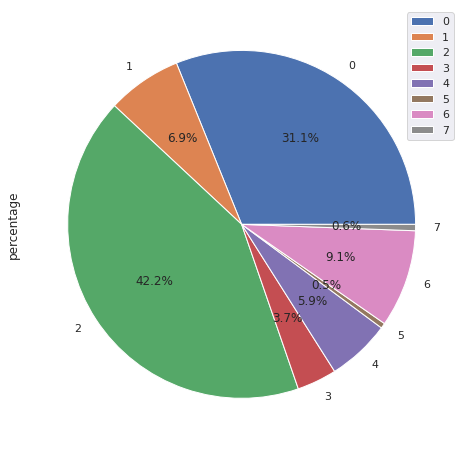

In [26]:
# creating the table for personal loan and housingloan 
df_loan = df.groupby(['loan','housing','y']).count()
df_loan = df_loan.reset_index()
df_loan_new = df_loan.loc[:,['loan','housing','y','age']]
df_loan_new.rename(columns={'loan': 'Housing Loan', 'housing': 'Personal Loan',
                            'y':'Subscribe term deposit','age':'number of people'}, inplace=True)
df_loan_new["percentage"] = df_loan_new["number of people"] / sum(df_loan_new['number of people'])*100
df_loan_new.plot.pie(y = 'percentage',autopct='%2.1f%%',figsize=(8, 8))
df_loan_new


#### Above 1,3,5,7 shows the percent of people who subscribe the term deposit and their sum is equal to 11.70%.

## 2.(e)(vi) Contact and y

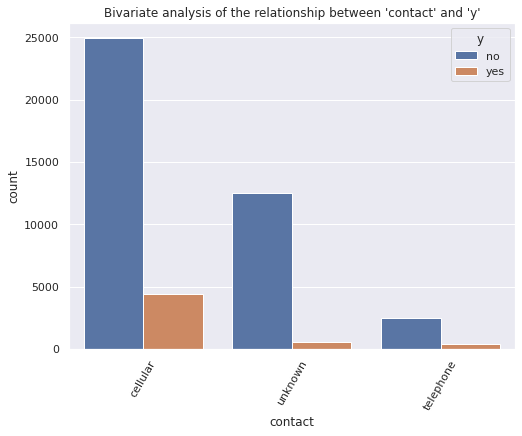

In [46]:
# Bivariate analysis of the relationship between 'contact' and 'y'
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8, 6)})
contact = sns.countplot(x="contact", data = df, hue = "y", order = df["contact"].value_counts().index)
contact.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'contact' and 'y'")
plt.show()

#### The direct ratio in this graph shows that people who were contacted by cellular phone were more likely to sign up for a deposit term. 

## 2.(e)(vii) poutcome feature and y

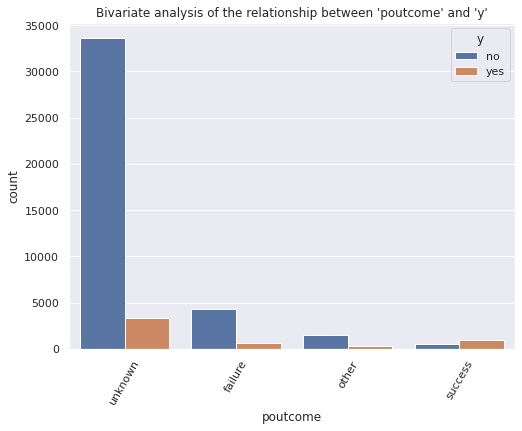

In [47]:
# Bivariate analysis of the relationship between 'poutcome' and 'y'
sns.set_theme(style='darkgrid')
sns.set(rc = {'figure.figsize':(8, 6)})
poutcome = sns.countplot(x="poutcome", data = df, hue = "y", order = df["poutcome"].value_counts().index)
poutcome.tick_params(axis='x', rotation=60)
plt.title("Bivariate analysis of the relationship between 'poutcome' and 'y'")
plt.show()

#### This one corresponds to the outcome of the previous marketing campaign's success. What exactly does "unknown" mean? This means that 78.7 percent of those contacted were unaware of the previous marketing campaign. This campaign's effort could have a positive impact on the previous campaign. "Success" has a very low percentage, but it is important for the analysis.

## 2.(e)(viii) Age and y

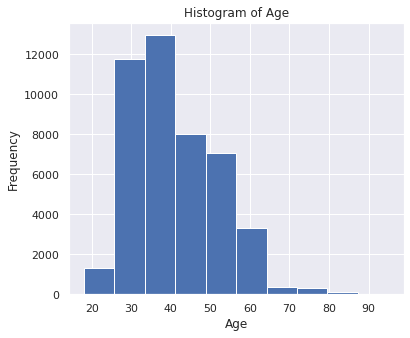

In [29]:
# Histogram of Age
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

#### The majority of the bank's customers in this dataset are between the ages of 30 and 50.

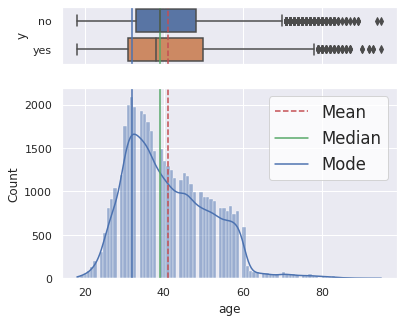

In [30]:
# histogram of age and y
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df['age'].mean()
median=df['age'].median()
mode=df['age'].mode().values[0]

age = sns.boxplot(data=df, x="age", y="y", ax=ax_box, order = df["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="age", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

#### Using a box visual representation, this function depicts the relationship between "age" and the categorical target variable. Furthermore, the histogram displays a bell-shaped image with a left-shifted normal distribution, as shown below. The population ranges from 20 to 60 years old. The box plot depicts a specific age group between 30 and 50. Probably because this is when people are more productive and stable. When we consider the job feature, this trend becomes stronger. Bivariate analysis is useful because it shows the call center that they need to target a specific segment of customers.

## 2.(e)(ix) Day Feature and y

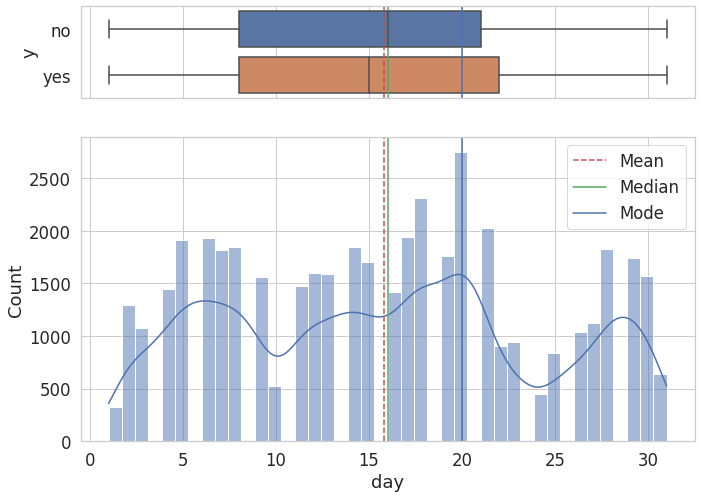

In [31]:
# histogram of day feature and y
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df['day'].mean()
median=df['day'].median()
mode=df['day'].mode().values[0]

day = sns.boxplot(data=df, x="day", y="y", ax=ax_box, order = df["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="day", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

#### The histogram exhibits symmetry across the entire data set, with a peak on day 20. This feature will be removed from the dataset analysis because it makes no significant contribution to the outcome. Plots show that people can sign up on any day of the week.

## 2.(e)(x) Duration Feature and y

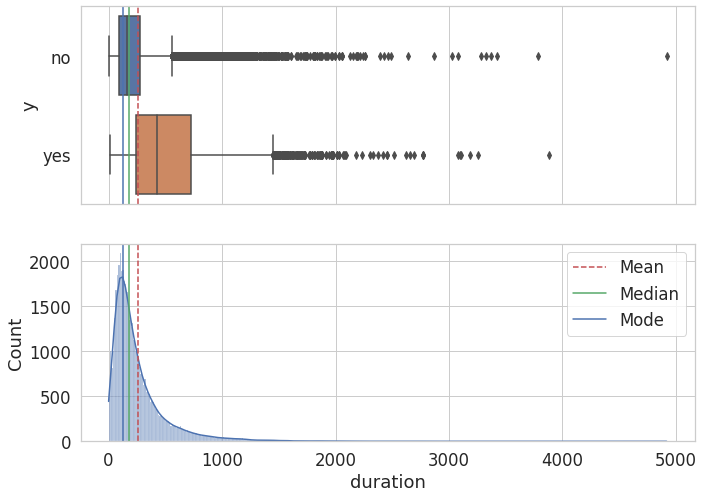

In [32]:
# Histogram of durtion feature and y
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True) # gridspec_kw= {"height_ratios": (0.3, 1)}
sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')
mean=df['duration'].mean()
median=df['duration'].median()
mode=df['duration'].mode().values[0]

duration = sns.boxplot(data=df, x="duration", y="y", ax=ax_box, order = df["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="duration", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

#### Duration feature influences the "y" result. We can see in the graph below that when the duration is between 0 and the first two minutes, most of people reject the offer. The remanent samples decide in a time span ranging from more than 2 minutes to 12 minutes. Only a few people take a long time to reject or accept an offer.

## 2.(e)(xi)Previous and y

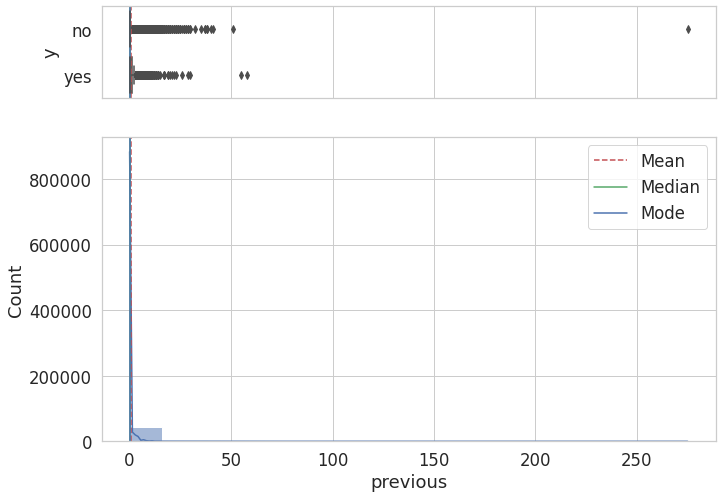

In [33]:
# histogram of previous and y
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.3, 1)})
sns.set(rc={'figure.figsize':(10,7)}, font_scale=1.5, style='whitegrid')
mean=df['previous'].mean()
median=df['previous'].median()
mode=df['previous'].mode().values[0]

previous = sns.boxplot(data=df, x="previous", y="y", ax=ax_box, order = df["y"].value_counts().index)
# age.set(xscale="log")
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.histplot(data=df, x="previous", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")
ax_hist.axvline(mode, color='b', linestyle='-', label="Mode")
ax_hist.legend()
ax_box.set(xlabel='')
plt.show()

#### "previous" refers to the number of contacts made prior to this campaign and for this client. As shown below, 36954 belong to the 0 group. This means that 36954 people were contacted for the first time for this campaign. Furthermore, the box-plot is missing; it does not show a distribution, indicating that there is no relationship with the target. It will also be removed from the analysis.

### B. Diagnostic Analysis

Diagnostic analytics is a type of advanced analytics that examines data or content to answer the question “why did it happen?”.

Diagnostic analytics takes a deeper look at data to better understand the causes of behaviors and events, to help answer critical workforce questions.


We want to understand the observation from the Descriptive Analysis more thoroughly in Diagnostic Analysis.

The major factor affecting the subscription of term deposit according to our studies are:
1. Age group of people
2. Education background of people

With the above fields the following Regression Analysis is performed to support our hypothesis.

## Evidences and Hypothesis:
### Evidences:
According to GoBankingRates' annual saving survey in 2018 almost 43% of personal savings is kept in bank in forms of  checking accounts, savings account and certificate of deposit. While the rest of savings are invested in 401k (employers sponsored defined contribution pension account),physical assets (home, car, etc) etc. So, it means that there is positive relationship between personal savings and term deposits.
### Thus we can say that there is direct positive relationship between personal savings and term deposits.
A positive association between a good education background and savings has been suggested in a number of articles.
According to study,[Knueven,L,Business Insider] she has mentioned that education affects the saving balance (according to Survey of Consumer Finances) as below:

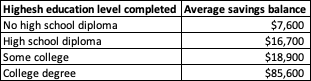

Moreover, according to article by [Perez,L,valuepenguin]  that mentioned data collected  from Federal Reserve in 2019, the individual with a college degree are more likely to have a higher bank account balance as below:

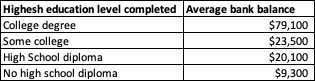

Also, according to  article by [Perez,L,valuepenguin]  that mentioned that olders individuals are likely to have higher balances in their savings accounts as below:

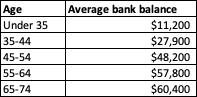


So from the above articles we can conclude that:

### Hypothesis 1 : There is significant positive relationship between education background and bank balance.

### Hypothesis 2:  There is significant positive relationship between age and bank balance.

### C. Predictive Analysis
Since, our dependent varibale is "Categorical" varibale, OLS (Ordinary Regression Model) wont be good fit . 
We use the Logistic Regression to better understand our prediction and ensure that the Analysis we performed is accurate.
### Logistic Regression: 
It is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.

Sometimes logistic regressions are difficult to interpret; the Intellectus Statistics tool easily allows you to conduct the analysis, then in plain English interprets the output.

We will be able to receive the percentage amount of prediction for the Model below. In other words, the Model's output will tell us how accurate our analysis is and how well we can anticipate the values.


In [34]:
train = pd.read_csv("train.csv", sep=';')
test = pd.read_csv("test.csv.xls", sep=';')
train_copy = train.copy()
test_copy = test.copy()
# Set up a flag to distinguish records in the concatenated dataset
train_copy['tst'] = 0
test_copy['tst'] = 1

# Concatenate train and test dataset to perform pre-prepocessing
train_test_concat = pd.concat([train_copy, test_copy], ignore_index=True)
del train_copy
del test_copy
gc.collect()

print(train_test_concat.shape)
print(train.shape)
print(test.shape)

(49732, 18)
(45211, 17)
(4521, 17)


In [35]:
# a. Replace method: Mode value
train_test_concat["job"].replace(["unknown"],train_test_concat["job"].mode(),inplace = True)
train_test_concat["education"].replace(["unknown"],train_test_concat["education"].mode(),inplace = True)
train_test_concat["contact"].replace(["unknown"],train_test_concat["contact"].mode(),inplace = True)

In [36]:
# b. Drop unrepresentative features
train_test_concat.drop(columns = ["month", "previous", "day", "pdays"], inplace = True)
print(train_test_concat)

       age            job  marital  education default  balance housing loan  \
0       58     management  married   tertiary      no     2143     yes   no   
1       44     technician   single  secondary      no       29     yes   no   
2       33   entrepreneur  married  secondary      no        2     yes  yes   
3       47    blue-collar  married  secondary      no     1506     yes   no   
4       33    blue-collar   single  secondary      no        1      no   no   
...    ...            ...      ...        ...     ...      ...     ...  ...   
49727   33       services  married  secondary      no     -333     yes   no   
49728   57  self-employed  married   tertiary     yes    -3313     yes  yes   
49729   57     technician  married  secondary      no      295      no   no   
49730   28    blue-collar  married  secondary      no     1137      no   no   
49731   44   entrepreneur   single   tertiary      no     1136     yes  yes   

        contact  duration  campaign poutcome   y  t

In [37]:
# a. Encoding categorical features.
train_test_concat['default'] = train_test_concat['default'].map({'yes': 1, 'no': 0})
train_test_concat['housing'] = train_test_concat['housing'].map({'yes': 1, 'no': 0})
train_test_concat['loan'] = train_test_concat['loan'].map({'yes': 1, 'no': 0})
train_test_concat['contact'] = train_test_concat['contact'].map({'telephone': 1, 'cellular': 0})
train_test_concat['y'] = train_test_concat['y'].map({'yes': 1, 'no': 0})
train_test_concat

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,y,tst
0,58,management,married,tertiary,0,2143,1,0,0,261,1,unknown,0,0
1,44,technician,single,secondary,0,29,1,0,0,151,1,unknown,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,0,76,1,unknown,0,0
3,47,blue-collar,married,secondary,0,1506,1,0,0,92,1,unknown,0,0
4,33,blue-collar,single,secondary,0,1,0,0,0,198,1,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,0,-333,1,0,0,329,5,unknown,0,1
49728,57,self-employed,married,tertiary,1,-3313,1,1,0,153,1,unknown,0,1
49729,57,technician,married,secondary,0,295,0,0,0,151,11,unknown,0,1
49730,28,blue-collar,married,secondary,0,1137,0,0,0,129,4,other,0,1


In [38]:
# a. ['job', 'marital', 'education', 'poutcome'] are categorical variable that are converted into dummy/indicator variables.

train_test_concat = pd.get_dummies(train_test_concat, columns=['job', 'marital', 'education', 'poutcome'])
train_test_concat

,age,default,balance,housing,loan,contact,duration,campaign,y,tst,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,0,261,1,0,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,0,151,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,0,76,1,0,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,0,92,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,33,0,1,0,0,0,198,1,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,0,-333,1,0,0,329,5,0,1,...,0,1,0,0,1,0,0,0,0,1
49728,57,1,-3313,1,1,0,153,1,0,1,...,0,1,0,0,0,1,0,0,0,1
49729,57,0,295,0,0,0,151,11,0,1,...,0,1,0,0,1,0,0,0,0,1
49730,28,0,1137,0,0,0,129,4,0,1,...,0,1,0,0,1,0,0,1,0,0


In [39]:
# Logistic Regression model for classification
# Training, Test, & Split
y = train_test_concat["y"]
X = train_test_concat.drop("y",axis = 1)

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# Logistic Regression Model 1: The performance did not improve with data scaling.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [40]:
# Logistic Regression model evaluation.
# Evaluation 1.
# importing required library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score

print(confusion_matrix(y_pred, y_test))
print(classification_report(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[17226  1583]
 [  374   710]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     17600
           1       0.65      0.31      0.42      2293

    accuracy                           0.90     19893
   macro avg       0.79      0.64      0.68     19893
weighted avg       0.89      0.90      0.89     19893

Accuracy: 0.9016236867239733


In [41]:
##Oversampling. Overcoming imbalance problem
from imblearn.over_sampling import RandomOverSampler

ROS = RandomOverSampler(sampling_strategy='minority', random_state=1)

X_train_ROS, y_train_ROS = ROS.fit_resample(X_train, y_train)
np.bincount(y_train_ROS)

array([26322, 26322])

In [42]:
# Second test of LR model with oversampling
logreg_oversampling = LogisticRegression(solver='liblinear')
logreg_oversampling.fit(X_train_ROS, y_train_ROS)
y_pred_oversampling = logreg_oversampling.predict(X_test)


In [43]:
# Evaluation 2.
print(confusion_matrix(y_pred_oversampling, y_test))
print(classification_report(y_test, y_pred_oversampling))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_oversampling))

[[14648   514]
 [ 2952  1779]]
              precision    recall  f1-score   support

           0       0.97      0.83      0.89     17600
           1       0.38      0.78      0.51      2293

    accuracy                           0.83     19893
   macro avg       0.67      0.80      0.70     19893
weighted avg       0.90      0.83      0.85     19893

Accuracy: 0.8257678580405168


####  Following conclusion can be made:
1. From above confusion_matrix in the output, 14,648 & 1,779 are actual predictions and 514 & 2,952 are in correct predictions.

2. Based on the accuracy analysis above, we can conclude that the model correctly predicted 82.5 percent of cases.

3. This demonstrated that the model properly projected attrition for 82.5 percent of term deposit subscriptions.

## 3. A.Conclusion

## 3.A1 Descriptive Analysis:
Finally, the main results of our Descriptive Analysis are as follows:

1. Approximately one-tenth (1/10) of customer contacted has subscribed the term deposit from marketing campaign.

2. Customers who purchased term deposits are on average older than those who did not.

3. For customers who purchased term deposit, the duration (last contact duration, in seconds) is higher.

4. Majority of customers who subscribed term deposit are highly qualified.
5. There is no relation between "Marital Status" and "Subcription of term deposit" as marital status doesn't have much more effect on customers subscribtion.
6. May had a slightly higher number of subscribers than the other months. 
7. People with no housing loan and no personal loan are subscribing more to the term deposit plan.
8. The people who were contacted by cellular phone were more likely to sign up for a deposit term.
9. The majority of the bank's customers in this dataset are between the ages of 30 and 50.
10. The duration feature influences the "y" result. When the duration is between 0 and the first two minutes, most people reject the offer. The remanent samples decide in a time span ranging from more than 2 minutes to 12 minutes. Only a few people take a long time to reject or accept an offer. 


## 3.A2 Diagnostic Analysis
As a consequence of our diagnostic investigation, we discovered that persons with better education backgrounds have more savings, which leads to more bank deposits.

## 3.A3 Predictive Analysis
We used Logistic Regression to forecast the accuracy percentage of our study because our Regression Model was not a good fit. We estimate that our model is accurate up to 82.5 percent based on the results. This means that we can forecast client subscriptions for 82.5 percent of the whole population. 

The management may currently forecast a term deposit subscription rate of 82.5 percent


## 3.A4 Prescriptive Analysis

The Management is now in a position to :
1. Determine the potential targeted clients based on a variety of characteristics such as age and educational background.
2. Apply corrective actions to the banking marketing and figure out why people aren't signing up for the term deposit plan.
3. For upcoming promotions, management can identify potential clients by categorical identification and provide a corrective action plan.

## 3.B Business Implication for audiences


The Hypothesis considered for our study was - 

Hypothesis 1: There is significant positive relationship between education background and bank balance.

Hypothesis 2:  There is significant positive relationship between age and bank balance.

According to our findings we were able to conduct that "Hypothesis 1: There is significant positive relationship between education background and bank balance." is the one of the key reasons the customers subscribes the term deposits. If the customers have high education background it is likely that they will subscribe more term deposits.

## 3.C Limitation of the Project

For our study, the dataset offered the following restriction. 

1) "Subscription of term deposit" is the dependent variable, or the variable under our study. This variable's data is categorical rather than numerical. As a result, relying solely on multiple field to reach a conclusion proved difficult.

2) Our classes are unbalanced, with an 89:11 ratio of no-subscription instances to subscription instances. As a result, we'll need to perform oversampling on our dataset



## 3.D Future Potential

Complex algorithms and machine learning technologies can be utilized to examine and evaluate our dataset in order to accurately forecast the outcome. This allows management to fully comprehend the variables impacting decisions, such as the factors influencing client term deposit subscriptions

# References

1. https://www.kaggle.com/prakharrathi25/banking-dataset-marketing-targets?select=test.csv 
2. https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d.
3. https://www.britannica.com/technology/data-processing.
4. https://www.investopedia.com/terms/d/descriptive-analytics.asp.
5. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
6. https://www.indicative.com/resource/diagnostic-analytics/
7. https://www.gobankingrates.com/retirement/planning/where-americans-store-wealth/
8. https://www.valuepenguin.com/banking/average-savings-account-balance  
9. https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-logistic-regression/ 
10. https://www.codecademy.com/articles/seaborn-design-i#:~:text=Seaborn%20has%20five%20built%2Din,better%20suit%20your%20presentation%20needs.
11. https://datatofish.com/logistic-regression-python/
12. https://www.xplenty.com/blog/prescriptive-analytics/